# Tumour Detection using DNA Microarray Datasets

# Import Libaries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import pyreadr
import math
import csv

from tqdm import tqdm
from pathlib import Path
from pyreadr import read_r

# Configs

In [2]:
fold = '5.0'
root_dir = '/media/data/hungnt/work/Datasets/BTMD/'
DATA_PATH = os.path.join(root_dir, 'Dataset')
FEATURES_PATH = os.path.join(DATA_PATH, 'Features')
LABELS_PATH = os.path.join(DATA_PATH, 'Labels', 'y.RData')
ANNO_PATH = os.path.join(DATA_PATH, 'Anno', 'anno.RData')
csv_filename = f'total_{fold}.csv'
CSVS_DIR = os.path.join(DATA_PATH, 'csv')
TOTAL_CSVS_DIR  = os.path.join(DATA_PATH, 'total_csv')
CSV_FILE_PATH = os.path.join(TOTAL_CSVS_DIR, csv_filename)

# Prepare Data

(Get only the first outer fold and its 5 inner fold as the dataset to train and validate our model)

## Read data into dataframes

In [3]:
file_name = 'betas.2.0.RData'
file_path = os.path.join(FEATURES_PATH, file_name)
print(file_path)  
dict_features = pyreadr.read_r(file_path)
df_train = dict_features['betas.train']
df_test = dict_features['betas.test']
    
df_labels = pyreadr.read_r(LABELS_PATH)['y']
df_anno = pyreadr.read_r(ANNO_PATH)['anno']
df_total = pd.concat([df_train, df_test])

/media/data/hungnt/work/Datasets/BTMD/Dataset/Features/betas.2.0.RData


In [4]:
df_total

,cg22054918,cg25570913,cg16476975,cg03940848,cg02809746,cg01517680,cg04110886,cg18222083,cg14262681,cg05649108,...,cg10157902,cg18319104,cg00603435,cg13750264,cg22052948,cg02509058,cg09175843,cg05430997,cg14494620,cg20002958
5684819014_R03C02,0.947269,0.963694,0.008453,0.123884,0.494731,0.028322,0.055772,0.014548,0.002894,0.038964,...,0.257397,0.183278,0.143933,0.941976,0.645033,0.061451,0.522279,0.739246,0.175601,0.136380
5684819014_R05C02,0.719027,0.885362,0.067590,0.000000,0.772570,0.704825,0.170992,0.000000,0.000775,0.809885,...,0.430759,0.920728,0.144135,0.799081,0.787824,0.168270,0.017414,0.331051,0.258241,0.352351
5684819014_R06C02,0.986904,1.000000,0.000000,0.038046,0.975408,0.000217,0.079723,0.715507,0.778558,0.996868,...,0.174500,0.938392,0.000000,0.949839,0.963896,0.049968,0.141987,0.129604,0.774427,0.093152
5684819013_R05C02,0.163068,0.947795,0.231008,0.000000,0.714640,0.032332,0.091954,0.000000,0.000000,0.871492,...,0.507717,0.907869,0.073046,0.832177,0.717314,0.394293,0.000000,0.456513,0.150643,0.428983
5684819014_R03C01,0.972470,0.984159,0.119748,0.008277,0.914704,0.433428,0.014778,0.000502,0.000000,0.951393,...,0.167898,0.933455,0.049324,0.930964,0.910489,0.095407,0.008454,0.134103,0.118686,0.459857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998568129_R06C02,0.937409,0.139277,0.938522,0.025541,0.079950,0.639447,0.045860,0.016553,0.953162,0.109244,...,0.235079,0.194642,0.138646,0.888485,0.473739,0.258273,0.083731,0.471641,0.203705,0.188432
101231000014_R01C02,0.039292,0.961631,0.954719,0.928027,0.919498,0.953214,0.044966,0.160665,0.038299,0.941144,...,0.161431,0.168292,0.038876,0.765759,0.346296,0.080014,0.065036,0.152392,0.902641,0.119335
200091640050_R05C02,0.049714,0.134149,0.943027,0.853760,0.926505,0.966671,0.970730,0.256427,0.975683,0.386815,...,0.271161,0.693522,0.838523,0.242235,0.679219,0.064268,0.126478,0.789400,0.306418,0.910546
200091640051_R03C02,0.109991,0.634747,0.967823,0.849322,0.900211,0.954470,1.000000,0.155567,0.789861,0.921865,...,0.774149,0.877537,0.567769,0.734454,0.338898,0.095506,0.151452,0.911589,0.524005,0.901155


In [5]:
df_labels

,y
0,"GBM, G34"
1,"DMG, K27"
2,"DMG, K27"
3,"DMG, K27"
4,"DMG, K27"
...,...
2796,"PIN T, PB A"
2797,ANA PA
2798,ANA PA
2799,ANA PA


In [6]:
print(df_labels.iloc[0])

y    GBM, G34
Name: 0, dtype: category
Categories (91, object): ['A IDH', 'A IDH, HG', 'ANA PA', 'ATRT, MYC', ..., 'SFT HMPC', 'SUBEPN, PF', 'SUBEPN, SPINE', 'SUBEPN, ST']


In [7]:
# %% script false
df_anno

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_city,contact_zip/postal_code,contact_country,supplementary_file,supplementary_file.1,data_row_count,relation,material:ch1,methylation class:ch1,sentrix
rownames,,,,,,,,,,,,,,,,,,,,,
GSM2402854,"GBM, G34, sample 1 [reference set]",GSM2402854,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: GBM, G34",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"GBM, G34",5684819014_R03C02
GSM2402855,"DMG, K27, sample 2 [reference set]",GSM2402855,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R05C02
GSM2402856,"DMG, K27, sample 3 [reference set]",GSM2402856,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R06C02
GSM2402857,"DMG, K27, sample 4 [reference set]",GSM2402857,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819013_R05C02
GSM2402858,"DMG, K27, sample 5 [reference set]",GSM2402858,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R03C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2405653,"PIN T, PB A, sample 2797 [reference set]",GSM2405653,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: PIN T, PB A",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,"PIN T, PB A",200078650174_R03C01
GSM2405654,"ANA PA, sample 2798 [reference set]",GSM2405654,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,methylation class: ANA PA,...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,ANA PA,200275560089_R06C02
GSM2405655,"ANA PA, sample 2799 [reference set]",GSM2405655,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,methylation class: ANA PA,...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,ANA PA,200275560098_R02C02


In [8]:
print('Train: ', df_train.shape, '\nTest:', df_test.shape, '\nTotal: ', df_total.shape, '\nLabels: ', df_labels.shape, '\nAnno: ', df_anno.shape)

Train:  (2221, 10000) 
Test: (580, 10000) 
Total:  (2801, 10000) 
Labels:  (2801, 1) 
Anno:  (2801, 38)


## Create csv files

In [9]:
# titles_list = list(df_anno.loc[:, 'title'])
# titles_list = [','.join(label.split(',')[:-1]) for label in titles_list]
# print(titles_list[-6:-1])
titles_list = list(df_anno.loc[:, 'methylation class:ch1'])
print(titles_list[-6:-1])

['LGG, DIG/DIA', 'PIN T,  PB A', 'ANA PA', 'ANA PA', 'ANA PA']


In [10]:
print(dict(pd.Series(titles_list).value_counts()))

{'GBM, RTK II': 143, 'MB, G4': 138, 'LGG, PA PF': 114, 'EPN, PF A': 91, 'MNG': 90, 'MB, SHH CHL AD': 84, 'O IDH': 80, 'DMG, K27': 78, 'A IDH': 78, 'MB, G3': 77, 'EPN, RELA': 70, 'GBM, RTK I': 64, 'GBM, MES': 56, 'MB, SHH INF': 52, 'EPN, PF B': 51, 'A IDH, HG': 46, 'PLEX, PED B': 46, 'ATRT, SHH': 46, 'PXA': 44, 'LGG, DNT': 44, 'ETMR': 43, 'GBM, G34': 41, 'CNS NB, FOXR2': 39, 'MB, WNT': 39, 'LGG, PA MID': 38, 'SUBEPN, PF': 37, 'ATRT, TYR': 37, 'PITUI': 29, 'ATRT, MYC': 29, 'EPN, MPE': 28, 'EPN, SPINE': 27, 'HMB': 25, 'CPH, ADM': 25, 'CONTR, INFLAM': 24, 'LGG, PA/GG ST': 24, 'CONTR, REACT': 23, 'SCHW': 23, 'ENB, A': 23, 'HGNET, BCOR': 23, 'PIN T,  PB B': 22, 'PLEX, AD': 22, 'PTPR, B': 22, 'LGG, MYB': 22, 'ANA PA': 21, 'CN': 21, 'PITAD, FSH LH': 21, 'LGG, GG': 21, 'HGNET, MN1': 21, 'LGG, SEGA': 21, 'CPH, PAP': 20, 'RETB': 19, 'PIN T, PPT': 19, 'SUBEPN, ST': 19, 'PGG, nC': 19, 'PITAD, ACTH': 18, 'PITAD, STH SPA': 17, 'GBM, MYCN': 16, 'ENB, B': 16, 'SFT HMPC': 16, 'PLEX, PED A': 15, 'MELCYT'

In [11]:
df_link = df_anno.loc[:, ['title', 'sentrix']]
df_link.loc[:, 'title'] = df_link['title'].replace(list(df_link['title']), titles_list)
df_link

,title,sentrix
rownames,,
GSM2402854,"GBM, G34",5684819014_R03C02
GSM2402855,"DMG, K27",5684819014_R05C02
GSM2402856,"DMG, K27",5684819014_R06C02
GSM2402857,"DMG, K27",5684819013_R05C02
GSM2402858,"DMG, K27",5684819014_R03C01
...,...,...
GSM2405653,"PIN T, PB A",200078650174_R03C01
GSM2405654,ANA PA,200275560089_R06C02
GSM2405655,ANA PA,200275560098_R02C02


In [12]:
dict_link = {sentrix: title for sentrix, title in zip(df_link['sentrix'], df_link['title'])}
dict_link

{'5684819014_R03C02': 'GBM, G34',
 '5684819014_R05C02': 'DMG, K27',
 '5684819014_R06C02': 'DMG, K27',
 '5684819013_R05C02': 'DMG, K27',
 '5684819014_R03C01': 'DMG, K27',
 '5684819014_R01C02': 'GBM, G34',
 '5911815001_R04C01': 'GBM, G34',
 '5911815001_R03C01': 'DMG, K27',
 '5911815001_R02C01': 'GBM, G34',
 '5684819013_R04C01': 'DMG, K27',
 '5684819013_R03C02': 'DMG, K27',
 '5684819014_R02C02': 'DMG, K27',
 '5684819013_R02C01': 'ATRT, SHH',
 '5684819013_R05C01': 'GBM, G34',
 '5911815023_R01C01': 'CONTR, CEBM',
 '5911815023_R02C01': 'CONTR, CEBM',
 '5684819026_R01C02': 'GBM, MYCN',
 '5911815001_R03C02': 'DMG, K27',
 '5911815023_R04C01': 'CONTR, CEBM',
 '5911815023_R05C01': 'CONTR, CEBM',
 '5911815023_R06C01': 'CONTR, CEBM',
 '5684819026_R02C01': 'DMG, K27',
 '6164621155_R05C02': 'GBM, G34',
 '6164621081_R06C02': 'GBM, G34',
 '6164621131_R02C02': 'GBM, G34',
 '6164621081_R06C01': 'DMG, K27',
 '6164621081_R04C02': 'GBM, G34',
 '6164621155_R03C01': 'DMG, K27',
 '6164621131_R02C01': 'GBM, G34

In [13]:
dict_link['200078650174_R03C01']

'PIN T,  PB A'

In [14]:
list_labels = [dict_link[id] for id in list(df_total.index)]
list_labels

['GBM, G34',
 'DMG, K27',
 'DMG, K27',
 'DMG, K27',
 'DMG, K27',
 'GBM, G34',
 'GBM, G34',
 'DMG, K27',
 'GBM, G34',
 'DMG, K27',
 'DMG, K27',
 'DMG, K27',
 'ATRT, SHH',
 'CONTR, CEBM',
 'GBM, MYCN',
 'DMG, K27',
 'CONTR, CEBM',
 'CONTR, CEBM',
 'CONTR, CEBM',
 'DMG, K27',
 'GBM, G34',
 'GBM, G34',
 'GBM, G34',
 'DMG, K27',
 'DMG, K27',
 'GBM, G34',
 'LGG, PA PF',
 'CONTR, REACT',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, RGNT',
 'LGG, PA PF',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'ATRT, MYC',
 'ATRT, SHH',
 'ATRT, SHH',
 'ATRT, TYR',
 'ATRT, TYR',
 'ATRT, TYR',
 'ATRT, MYC',
 'LGG, PA/GG ST',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, SEGA',
 'LGG, PA PF',
 'LGG, PA PF',
 'CONTR, REACT',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT

In [15]:
# Add label column
df_total['label'] = list_labels
df_total

,cg22054918,cg25570913,cg16476975,cg03940848,cg02809746,cg01517680,cg04110886,cg18222083,cg14262681,cg05649108,...,cg18319104,cg00603435,cg13750264,cg22052948,cg02509058,cg09175843,cg05430997,cg14494620,cg20002958,label
5684819014_R03C02,0.947269,0.963694,0.008453,0.123884,0.494731,0.028322,0.055772,0.014548,0.002894,0.038964,...,0.183278,0.143933,0.941976,0.645033,0.061451,0.522279,0.739246,0.175601,0.136380,"GBM, G34"
5684819014_R05C02,0.719027,0.885362,0.067590,0.000000,0.772570,0.704825,0.170992,0.000000,0.000775,0.809885,...,0.920728,0.144135,0.799081,0.787824,0.168270,0.017414,0.331051,0.258241,0.352351,"DMG, K27"
5684819014_R06C02,0.986904,1.000000,0.000000,0.038046,0.975408,0.000217,0.079723,0.715507,0.778558,0.996868,...,0.938392,0.000000,0.949839,0.963896,0.049968,0.141987,0.129604,0.774427,0.093152,"DMG, K27"
5684819013_R05C02,0.163068,0.947795,0.231008,0.000000,0.714640,0.032332,0.091954,0.000000,0.000000,0.871492,...,0.907869,0.073046,0.832177,0.717314,0.394293,0.000000,0.456513,0.150643,0.428983,"DMG, K27"
5684819014_R03C01,0.972470,0.984159,0.119748,0.008277,0.914704,0.433428,0.014778,0.000502,0.000000,0.951393,...,0.933455,0.049324,0.930964,0.910489,0.095407,0.008454,0.134103,0.118686,0.459857,"DMG, K27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998568129_R06C02,0.937409,0.139277,0.938522,0.025541,0.079950,0.639447,0.045860,0.016553,0.953162,0.109244,...,0.194642,0.138646,0.888485,0.473739,0.258273,0.083731,0.471641,0.203705,0.188432,"HGNET, MN1"
101231000014_R01C02,0.039292,0.961631,0.954719,0.928027,0.919498,0.953214,0.044966,0.160665,0.038299,0.941144,...,0.168292,0.038876,0.765759,0.346296,0.080014,0.065036,0.152392,0.902641,0.119335,LIPN
200091640050_R05C02,0.049714,0.134149,0.943027,0.853760,0.926505,0.966671,0.970730,0.256427,0.975683,0.386815,...,0.693522,0.838523,0.242235,0.679219,0.064268,0.126478,0.789400,0.306418,0.910546,"ENB, A"
200091640051_R03C02,0.109991,0.634747,0.967823,0.849322,0.900211,0.954470,1.000000,0.155567,0.789861,0.921865,...,0.877537,0.567769,0.734454,0.338898,0.095506,0.151452,0.911589,0.524005,0.901155,"ENB, A"


## Save csv file

In [16]:
columns = list(df_total.columns)
index = list(df_total.index)
df_total.to_csv(CSV_FILE_PATH, index=True)

# Visualize class distribution

In [17]:
distribution = dict(df_total['label'].value_counts())
distribution

{'GBM, RTK II': 143,
 'MB, G4': 138,
 'LGG, PA PF': 114,
 'EPN, PF A': 91,
 'MNG': 90,
 'MB, SHH CHL AD': 84,
 'O IDH': 80,
 'A IDH': 78,
 'DMG, K27': 78,
 'MB, G3': 77,
 'EPN, RELA': 70,
 'GBM, RTK I': 64,
 'GBM, MES': 56,
 'MB, SHH INF': 52,
 'EPN, PF B': 51,
 'A IDH, HG': 46,
 'PLEX, PED B': 46,
 'ATRT, SHH': 46,
 'PXA': 44,
 'LGG, DNT': 44,
 'ETMR': 43,
 'GBM, G34': 41,
 'CNS NB, FOXR2': 39,
 'MB, WNT': 39,
 'LGG, PA MID': 38,
 'SUBEPN, PF': 37,
 'ATRT, TYR': 37,
 'ATRT, MYC': 29,
 'PITUI': 29,
 'EPN, MPE': 28,
 'EPN, SPINE': 27,
 'CPH, ADM': 25,
 'HMB': 25,
 'LGG, PA/GG ST': 24,
 'CONTR, INFLAM': 24,
 'SCHW': 23,
 'HGNET, BCOR': 23,
 'ENB, A': 23,
 'CONTR, REACT': 23,
 'PTPR, B': 22,
 'LGG, MYB': 22,
 'PLEX, AD': 22,
 'PIN T,  PB B': 22,
 'ANA PA': 21,
 'PITAD, FSH LH': 21,
 'CN': 21,
 'LGG, GG': 21,
 'LGG, SEGA': 21,
 'HGNET, MN1': 21,
 'CPH, PAP': 20,
 'RETB': 19,
 'PIN T, PPT': 19,
 'PGG, nC': 19,
 'SUBEPN, ST': 19,
 'PITAD, ACTH': 18,
 'PITAD, STH SPA': 17,
 'GBM, MYCN': 16,
 

In [18]:
labels = list(distribution.keys())
n_samples = list(distribution.values())

[Text(0, 0, 'GBM, RTK II'),
 Text(1, 0, 'MB, G4'),
 Text(2, 0, 'LGG, PA PF'),
 Text(3, 0, 'EPN, PF A'),
 Text(4, 0, 'MNG'),
 Text(5, 0, 'MB, SHH CHL AD'),
 Text(6, 0, 'O IDH'),
 Text(7, 0, 'A IDH'),
 Text(8, 0, 'DMG, K27'),
 Text(9, 0, 'MB, G3'),
 Text(10, 0, 'EPN, RELA'),
 Text(11, 0, 'GBM, RTK I'),
 Text(12, 0, 'GBM, MES'),
 Text(13, 0, 'MB, SHH INF'),
 Text(14, 0, 'EPN, PF B'),
 Text(15, 0, 'A IDH, HG'),
 Text(16, 0, 'PLEX, PED B'),
 Text(17, 0, 'ATRT, SHH'),
 Text(18, 0, 'PXA'),
 Text(19, 0, 'LGG, DNT'),
 Text(20, 0, 'ETMR'),
 Text(21, 0, 'GBM, G34'),
 Text(22, 0, 'CNS NB, FOXR2'),
 Text(23, 0, 'MB, WNT'),
 Text(24, 0, 'LGG, PA MID'),
 Text(25, 0, 'SUBEPN, PF'),
 Text(26, 0, 'ATRT, TYR'),
 Text(27, 0, 'ATRT, MYC'),
 Text(28, 0, 'PITUI'),
 Text(29, 0, 'EPN, MPE'),
 Text(30, 0, 'EPN, SPINE'),
 Text(31, 0, 'CPH, ADM'),
 Text(32, 0, 'HMB'),
 Text(33, 0, 'LGG, PA/GG ST'),
 Text(34, 0, 'CONTR, INFLAM'),
 Text(35, 0, 'SCHW'),
 Text(36, 0, 'HGNET, BCOR'),
 Text(37, 0, 'ENB, A'),
 Text(38, 

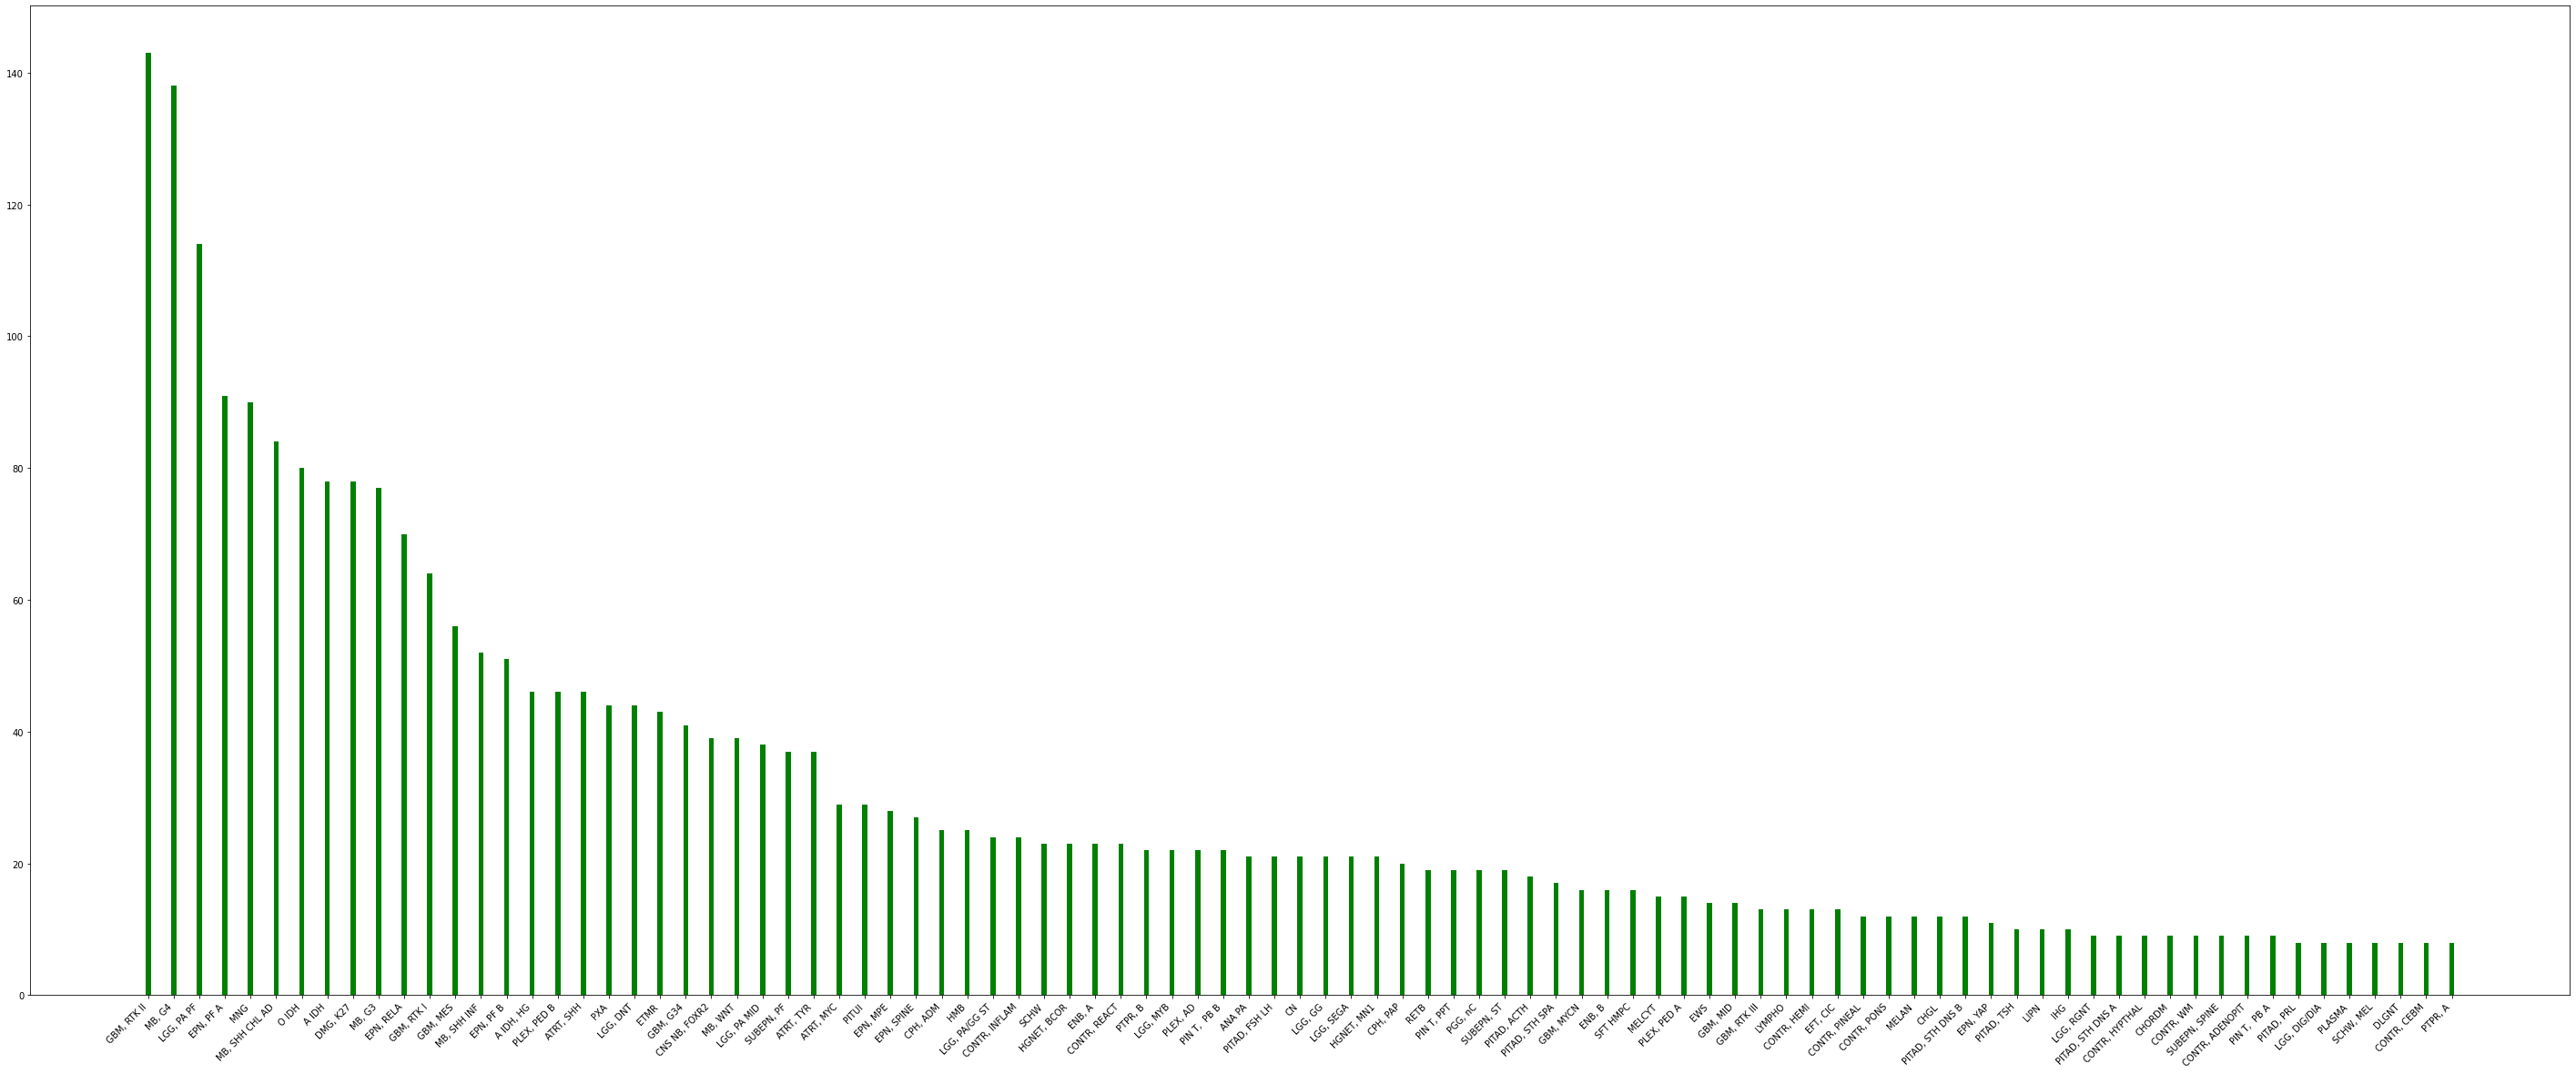

In [19]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(50)
column_width = 0.2
x_index = np.arange(len(labels))
rect = ax.bar(x = labels, height = n_samples, width = column_width, color = "green")
ax.set_xticks(x_index)
ax.set_xticklabels(labels = labels, rotation = 45, ha = 'right')

# References

[1]: [How to Replace Values in Pandas DataFrame](https://datatofish.com/replace-values-pandas-dataframe/)

[2]: [How to write to csv file using Python](https://www.pythontutorial.net/python-basics/python-write-csv-file/)